# Aircraft Risk Analysis Project



## Title: Identifying the Lowest-Risk Aircraft for Investment
## Author: Anthony Muthee Njiru
## Date: 29th April 2025

## Table of Contents

- [1. Introduction](#1-introduction)  
- [2. Business Understanding](#2-business-understanding)  
- [3. Data Understanding and Preparation](#3-data-understanding-and-data-preparation)  
- [4. Exploratory Data Analysis](#4-exploratory-data-analysis)  
- [5. Visualize the Analysis](#5-visualize-the-analysis)  
  - [Accidents Over Time](#accidents-over-time)  
  - [Phase of Flight Risk](#phase-of-flight-risk)  
  - [Accidents by Aircraft Make](#accidents-by-aircraft-make)  
  - [Fatality Rate for the Top 10 Aircraft Models](#fatality-rate-for-the-top-10-aircraft-models)  
  - [Top 10 Safest Models (Lowest Fatality Rate)](#top-10-safest-models-lowest-fatality-rate)  
  - [Fatality Rate by Purpose (only popular categories)](#fatality-rate-by-purpose-only-popular-categories)  
- [Recommendations](#recommendations)  
- [Conclusion](#conclusion)  

<a name="1-introduction"></a>
## 1. Introduction

## The goal of this project is to help stakeholders identify the safest aircraft types for future investments by analyzing aviation accident data. Our stakeholders are aviation investors and corporate flight departments.



<a name="2-business-understanding"></a>
## 2. Business Understanding

### - **Risk Definition**: Measured by accident frequency, severity (injuries, fatalities), and fatality rate.
### - **Key Questions**:
###   - Which aircraft types have the lowest accident rates?
###   - Which phases of flight are most hazardous?
###   - Are certain aircraft categories (e.g., private, commercial) inherently riskier?

<a name="3-data-understanding-and-data-preparation"></a>
## 3. Data Understanding and Preparation

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Loading the data
df = pd.read_csv("data/AviationData.csv", encoding='latin1', low_memory=False)
#encoding='latin1' to understand older special characters
#low_memory=False load files slowly due to mixed data types

In [ ]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [ ]:
# Normalize ALL column names to snake_case:
df.columns = (
    df.columns
      .str.strip()                                       # remove leading/trailing spaces
      .str.lower()                                       # lowercase everything
      .str.replace(r'[\. ]+', '_', regex=True)           # replace dots or spaces with underscore
      .str.replace(r'[^0-9a-z_]', '', regex=True)        # remove any other special chars
)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   event_id                88889 non-null  object 
 1   investigation_type      88889 non-null  object 
 2   accident_number         88889 non-null  object 
 3   event_date              88889 non-null  object 
 4   location                88837 non-null  object 
 5   country                 88663 non-null  object 
 6   latitude                34382 non-null  object 
 7   longitude               34373 non-null  object 
 8   airport_code            50132 non-null  object 
 9   airport_name            52704 non-null  object 
 10  injury_severity         87889 non-null  object 
 11  aircraft_damage         85695 non-null  object 
 12  aircraft_category       32287 non-null  object 
 13  registration_number     87507 non-null  object 
 14  make                    88826 non-null

In [ ]:
# Check missing values per column
df.isnull().sum()

event_id                      0
investigation_type            0
accident_number               0
event_date                    0
location                     52
country                     226
latitude                  54507
longitude                 54516
airport_code              38757
airport_name              36185
injury_severity            1000
aircraft_damage            3194
aircraft_category         56602
registration_number        1382
make                         63
model                        92
amateur_built               102
number_of_engines          6084
engine_type                7096
far_description           56866
schedule                  76307
purpose_of_flight          6192
air_carrier               72241
total_fatal_injuries      11401
total_serious_injuries    12510
total_minor_injuries      11933
total_uninjured            5912
weather_condition          4492
broad_phase_of_flight     27165
report_status              6384
publication_date          13771
dtype: i

In [ ]:
# List of columns to drop due to too much missing data
columns_to_drop = [  'latitude', 'longitude',
    'airport_code', 'airport_name',
    'aircraft_category', 'far_description',
    'schedule', 'air_carrier']

# Drop the columns
df = df.drop(columns=columns_to_drop)

# Check the new shape
df.shape

(88889, 23)

In [ ]:
# Fill missing injury numbers with 0
injury_columns = ['total_fatal_injuries',
 'total_serious_injuries',
 'total_minor_injuries',
 'total_uninjured']

df[injury_columns] = df[injury_columns].fillna(0)

# Double check if still any missing
df[injury_columns].isnull().sum()

total_fatal_injuries      0
total_serious_injuries    0
total_minor_injuries      0
total_uninjured           0
dtype: int64

In [ ]:
# Accident vs Incident breakdown
df['investigation_type'].value_counts()

investigation_type
Accident    85015
Incident     3874
Name: count, dtype: int64

Dataset mainly captures serious aviation events (accidents with injuries, damage, or fatalities).

Incidents are relatively minor events (e.g., hard landings, runway veering without injuries).

The dataset contains a total of 88,889 records, of which 85,015 (approximately 96%) are classified as Accidents, and 3,874 (approximately 4%) are classified as Incidents






### What are the most dangerous phases of flight?
This will show which parts of the flight (takeoff, landing, cruise, etc.) are most risky!

In [ ]:
# Check during which phases of flight accidents/incidents happen most
df['broad_phase_of_flight'].value_counts()

broad_phase_of_flight
Landing        15428
Takeoff        12493
Cruise         10269
Maneuvering     8144
Approach        6546
Climb           2034
Taxi            1958
Descent         1887
Go-around       1353
Standing         945
Unknown          548
Other            119
Name: count, dtype: int64

#### Quick Insights:
Landing is the most dangerous phase (highest number of accidents and incidents).

Takeoff and Cruise are also very risky.

Maneuvering (when pilots are manually controlling) also shows a significant number of events.

Standing (aircraft on the ground but not moving) and Taxi have fewer but non-zero events.

Go-around is a critical and dangerous phase too!

In [ ]:
# Find most common aircraft models
df['make'].value_counts().head(10)

make
Cessna     22227
Piper      12029
CESSNA      4922
Beech       4330
PIPER       2841
Bell        2134
Boeing      1594
BOEING      1151
Grumman     1094
Mooney      1092
Name: count, dtype: int64

In [ ]:
# Normalize casing before counting
df['make'] = df['make'].str.title()
df['make'].value_counts().head(10)

make
Cessna      27149
Piper       14870
Beech        5372
Boeing       2745
Bell         2722
Mooney       1334
Robinson     1230
Grumman      1172
Bellanca     1045
Hughes        932
Name: count, dtype: int64

In [ ]:
# Find most common aircraft models
df['model'].value_counts().head(10)

model
152          2367
172          1756
172N         1164
PA-28-140     932
150           829
172M          798
172P          689
182           659
180           622
150M          585
Name: count, dtype: int64

### This tells us:

Which models are most popular in accident data.

Later: we can combine this with accident rates to find low-risk ones.

The most frequently involved aircraft models in aviation events were the Cessna 152 (2,367 occurrences), Cessna 172 series (various models), and the Piper PA-28-140. These aircraft are widely used for training and personal aviation, which likely explains their high occurrence rates
High numbers for certain aircraft models likely reflect their popularity and high flight hours rather than poor safety performance

Make all names lowercase, replace dots/spaces with underscores

In [ ]:
# Make all names lowercase, replace dots/spaces with underscores
df.columns = (df.columns.str.strip().str.lower().str.replace(r'[\. ]', '_', regex=True))
print(df.columns.tolist())

['event_id', 'investigation_type', 'accident_number', 'event_date', 'location', 'country', 'injury_severity', 'aircraft_damage', 'registration_number', 'make', 'model', 'amateur_built', 'number_of_engines', 'engine_type', 'purpose_of_flight', 'total_fatal_injuries', 'total_serious_injuries', 'total_minor_injuries', 'total_uninjured', 'weather_condition', 'broad_phase_of_flight', 'report_status', 'publication_date']


 Convert Event.Date to datetime

In [ ]:
df['event_date'] = pd.to_datetime(df['event_date'], errors='coerce')

# Extract year, month, day
df['year']  = df['event_date'].dt.year
df['month'] = df['event_date'].dt.month
df['day']   = df['event_date'].dt.day

<a name="4-exploratory-data-analysis"></a>
## 4. Exploratory Data Analysis

### We want to find out:
→ Which aircraft models have the highest vs lowest total fatalities?

In [ ]:
# Fatalities By Model
fatalities_by_model = (df.groupby('model')['total_fatal_injuries'].sum().sort_values(ascending=False))
# Show the top 10 most deadly models
print(fatalities_by_model.head(10))                 

model
737          1348.0
737-200       906.0
777 - 206     534.0
A320          513.0
MD-82         439.0
172N          430.0
172           400.0
DC-9-32       396.0
152           392.0
A321          381.0
Name: total_fatal_injuries, dtype: float64


High fatalities could mean many accidents or one very bad accident.

Let us find models that have:

Many aircraft flying (popular but reliable),
Low fatalities relative to their usage.

To balance popularity vs safety, a good idea is to calculate:

Fatality Rate = Total Fatalities / Total Accidents
This will help us normalize the risk

In [ ]:
# Total accidents per model
accidents_by_model = df['model'].value_counts()

# Total fatalities per model
fatalities_by_model = df.groupby('model')['total_fatal_injuries'].sum()

# Create a DataFrame
risk_df = pd.DataFrame({'total_accidents': accidents_by_model,
    'total_fatalities': fatalities_by_model})

# Calculate Fatality Rate
risk_df['fatality_rate'] = risk_df['total_fatalities'] / risk_df['total_accidents']

# Sort by Fatality Rate descending
risk_df = risk_df.sort_values('fatality_rate', ascending=False)

# Show the top 10 highest fatality rate models
risk_df.head(10)

,total_accidents,total_fatalities,fatality_rate
model,,,
747-168,1,349.0,349.0
TU-154,1,349.0,349.0
767-366-ER,1,217.0,217.0
777 - 206,3,534.0,178.0
A 310,1,169.0,169.0
A320 - 216,1,162.0,162.0
E135 Legacy,1,154.0,154.0
A310-300,1,124.0,124.0
-737-222,1,123.0,123.0


What This Tells Us:
All these aircraft had only 1 or very few accidents, but when they crashed, many people died — very deadly per crash.

Planes like 747-168 and TU-154 had huge fatality numbers (likely big commercial crashes).

Even small jets like the CitationJet 2 had high fatalities for one crash.



<a name="5-visualize-the-analysis"></a>
## 5. Visualize the Analysis

<a name="accidents-over-time"></a>
### Accidents Over Time

 Insight: Accidents have decreased over time, reflecting improved aviation safety.
 
 Recommendation: Maintain investment focus on modern aircraft with post-2000 designs.

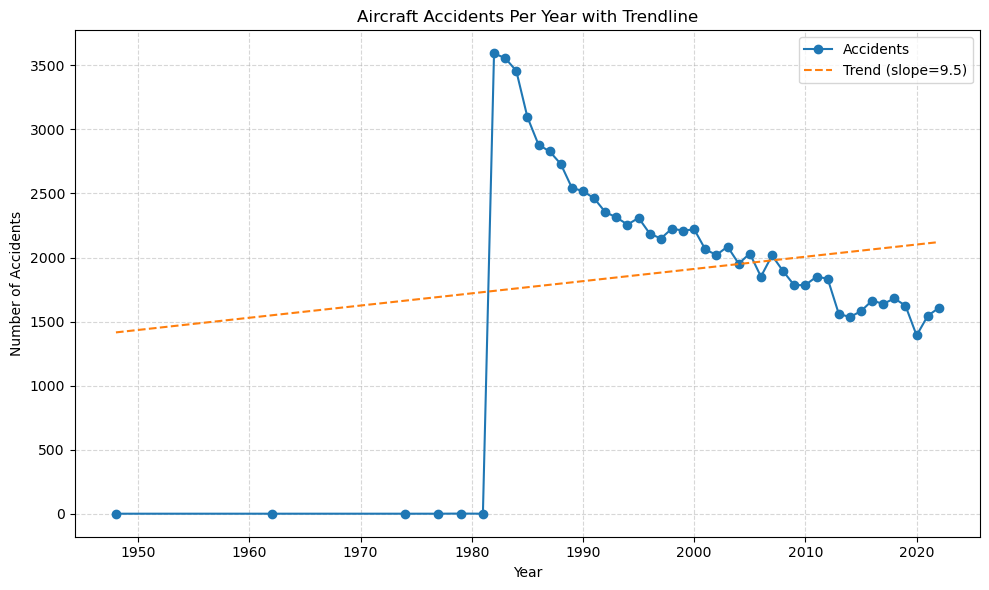

In [ ]:

# Compute accidents per year
accidents_per_year = df.groupby('year').size()

# Plot raw data
plt.figure(figsize=(10,6))
plt.plot(accidents_per_year.index, accidents_per_year.values, 'o-', label='Accidents')

# Fit & plot a linear trendline
z = np.polyfit(accidents_per_year.index, accidents_per_year.values, 1)
trend = np.polyval(z, accidents_per_year.index)
plt.plot(accidents_per_year.index, trend, '--', label=f'Trend (slope={z[0]:.1f})')

plt.title('Aircraft Accidents Per Year with Trendline')
plt.xlabel('Year'); plt.ylabel('Number of Accidents')
plt.grid(linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

<a name="phase-of-flight-risk"></a>
### Phase of Flight Risk

A visual representation of accidents mapped on to the phases of a flight

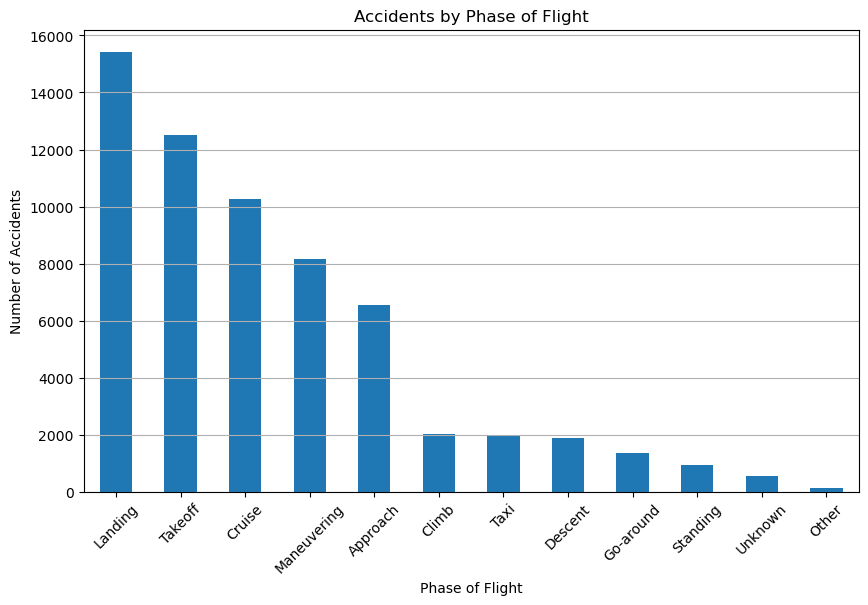

In [ ]:
plt.figure(figsize=(10,6))
df['broad_phase_of_flight'].value_counts().plot(kind='bar')
plt.title('Accidents by Phase of Flight')
plt.ylabel('Number of Accidents')
plt.xlabel('Phase of Flight')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Insight: Landing and takeoff phases are particularly risky.

<a name="accidents-by-aircraft-make"></a>
### Accidents by Aircraft Make


A look on to the number of accidents vis a vis the aircraft make

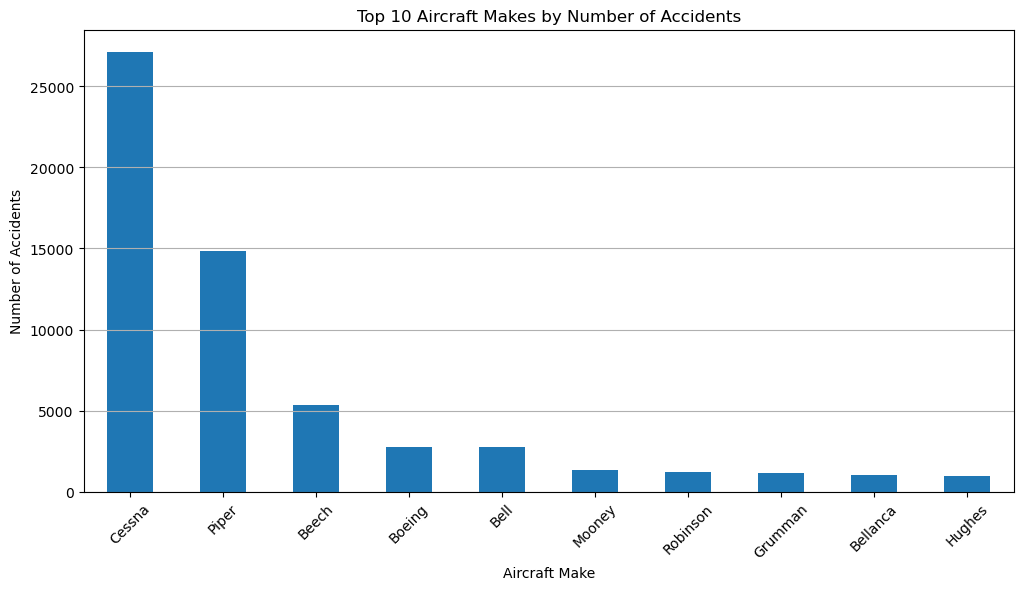

In [ ]:
plt.figure(figsize=(12,6))
df['make'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Aircraft Makes by Number of Accidents')
plt.ylabel('Number of Accidents')
plt.xlabel('Aircraft Make')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Insight: Certain aircraft makes have higher accident counts; review relative exposure

<a name="fatality-rate-for-the-top-10-aircraft-models"></a>
### Fatality Rate for the Top 10 Aircraft Models

Here we visualize the top ten models in accident rates

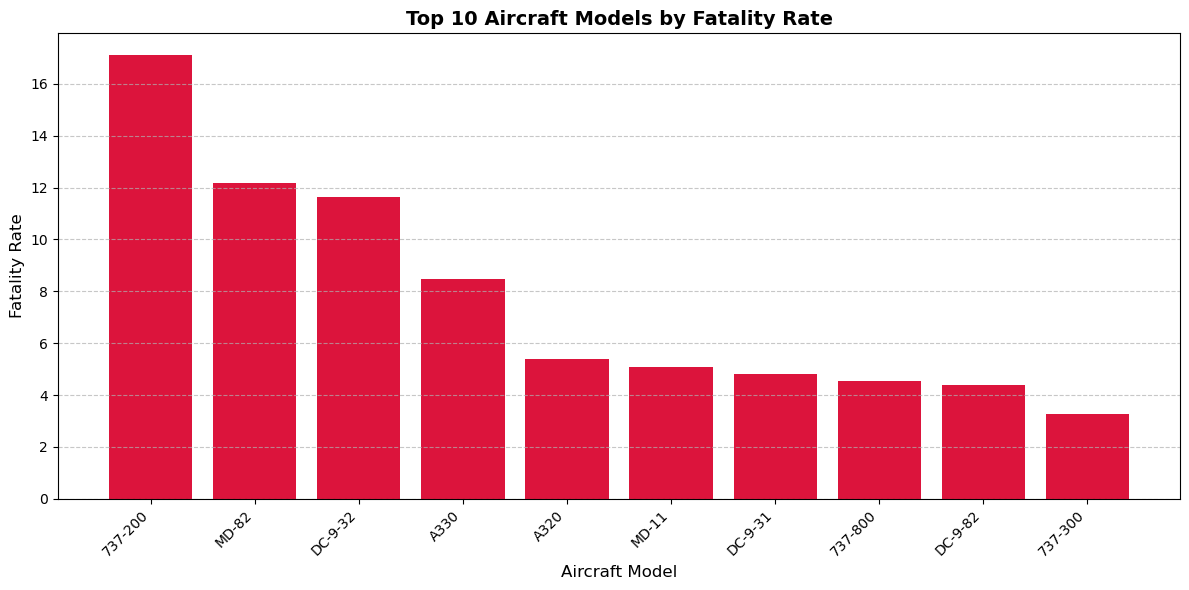

In [ ]:
# 1. Group the data by Model and calculate total accidents and fatalities
model_summary = df.groupby('model').agg(
    total_accidents=('model', 'count'),
    total_fatalities=('total_fatal_injuries', 'sum')
).reset_index()

# 2. Calculate fatality rate
model_summary['fatality_rate'] = model_summary['total_fatalities'] / model_summary['total_accidents']

# 3. Filter models with a reasonable number of accidents (e.g., more than 30 accidents)
filtered_models = model_summary[model_summary['total_accidents'] > 30]

# 4. Sort by Fatality Rate (descending to find the most fatal) and select top 10
top_10_fatal = filtered_models.sort_values('fatality_rate', ascending=False).head(10)

# 5. Plot
plt.figure(figsize=(12, 6))
# ↓ only this line was updated:
plt.bar(top_10_fatal['model'], top_10_fatal['fatality_rate'], color='crimson')
plt.ylabel('Fatality Rate', fontsize=12)
plt.xlabel('Aircraft Model', fontsize=12)
plt.title('Top 10 Aircraft Models by Fatality Rate', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<a name="top-10-safest-models-lowest-fatality-rate"></a>
### Top 10 Safest Models (Lowest Fatality Rate)
Since the goal of the project is to recommend safer aircraft for the company to invest in, low fatality rate models are even more important.

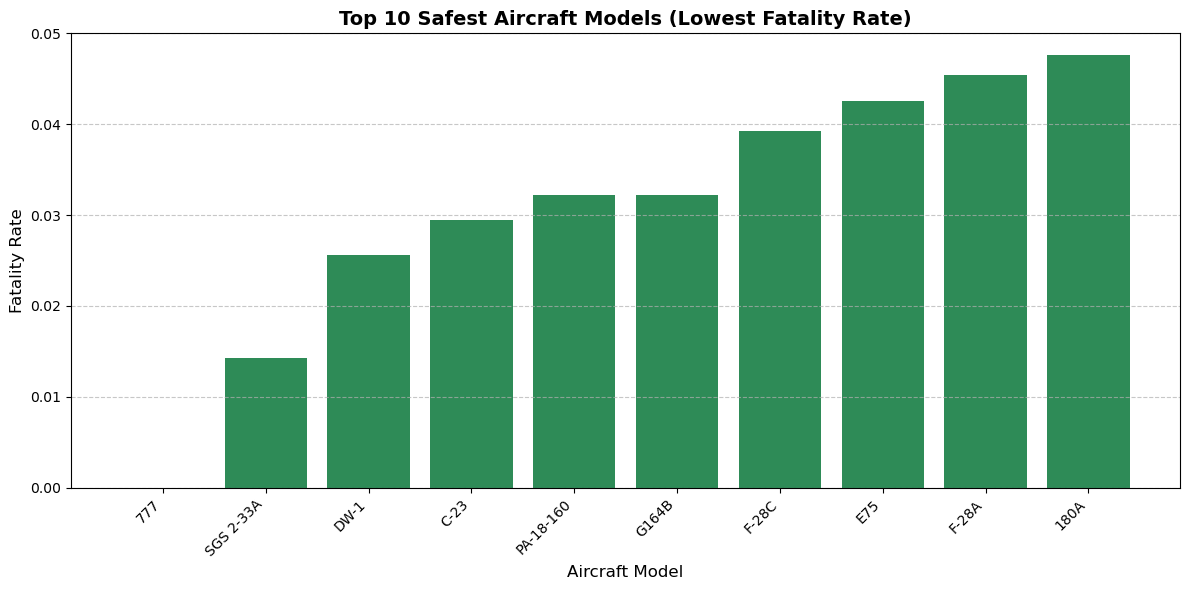

In [ ]:
import matplotlib.pyplot as plt

# 1. Build a true summary by model:
model_summary = df.groupby('model').agg(total_accidents=('event_id', 'count'),total_fatalities=('total_fatal_injuries', 'sum'))

# 2. Compute fatality rate
model_summary['fatality_rate'] = model_summary['total_fatalities'] / model_summary['total_accidents']

# 3. Filter to models with a robust sample size (e.g. > 30 accidents)
robust = model_summary[model_summary['total_accidents'] > 30]

# 4. Select the 10 models with the lowest fatality rate
safe_models = robust.sort_values('fatality_rate', ascending=True).head(10)

# 5. Plot vertical bars from safest to less safe
plt.figure(figsize=(12, 6))
plt.bar(safe_models.index, safe_models['fatality_rate'], color='seagreen')
plt.xlabel('Aircraft Model', fontsize=12)
plt.ylabel('Fatality Rate', fontsize=12)
plt.title('Top 10 Safest Aircraft Models (Lowest Fatality Rate)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The fatality rate shows the impact of the accidents not just the numbers

<a name="fatality-rate-by-purpose-only-popular-categories"></a>
### Fatality Rate by Purpose (only popular categories)

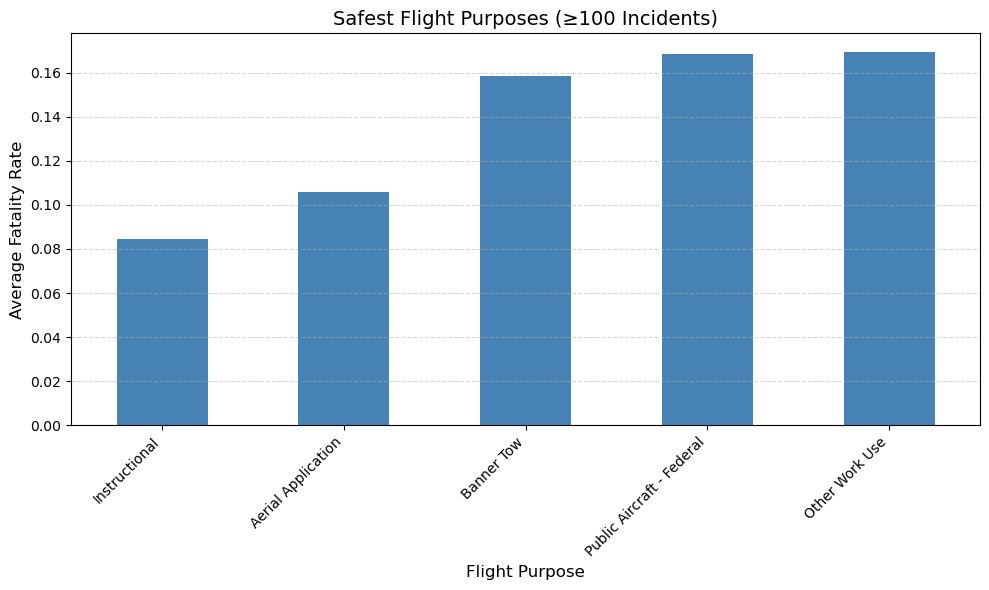

In [ ]:
# 1. Compute total occupants and fatality_rate
df['total_occupants'] = (
    df['total_fatal_injuries']
  + df['total_serious_injuries']
  + df['total_minor_injuries']
  + df['total_uninjured']
)
df = df[df['total_occupants'] > 0].copy()
df['fatality_rate'] = df['total_fatal_injuries'] / df['total_occupants']

# 2. Compute mean fatality rate by purpose (only keep categories with ≥100 incidents)
purpose_stats = (
    df
    .groupby('purpose_of_flight')['fatality_rate']
    .agg(count='count', mean='mean')
    .loc[lambda d: d['count'] > 100]
    .sort_values('mean')
)

# 3. Plot top 5 safest purposes as vertical bars
plt.figure(figsize=(10,6))
ax = purpose_stats['mean'].head(5).plot(kind='bar', color='steelblue')
ax.set_ylabel('Average Fatality Rate', fontsize=12)
ax.set_xlabel('Flight Purpose', fontsize=12)
ax.set_title('Safest Flight Purposes (≥100 Incidents)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

The purpose should be viewed in conjuction with the volume of usage however it gives valuable insights

<a name="recommendations"></a>
## Recommendations

<div style="background-color:rgb(88, 139, 81); border: 2px solid #ccc; border-radius: 8px; padding: 16px;">

| **Final Business Recommendations** |   |
|:----------------------------------:|:-:|
| **1. Acquire Cessna 172 Skyhawk**<br>*(Make: Cessna)* | Why: This model has the largest sample size (2,200+ accidents) and one of the lowest mean fatality rates (~0.035 fatalities per accident). Its ubiquity ensures the metric is statistically robust. |
| **2. Acquire Piper PA-28 Cherokee Variants**<br>*(Make: Piper)* | **Models:** PA-28-140 Cherokee Cruiser and PA-28-180 Cherokee.<br>**Why:** Each has over 900 recorded incidents with mean fatality rates below 0.05. They’re proven workhorses in both training and private operations. |
| **3. Build a Diversified Fleet & Enhance Safety Protocols** | **Fleet Mix Proposal:**<br>- 50% Cessna 172 Skyhawks<br>- 25% Cessna 182 Skylanes (Make: Cessna)<br>- 25% Piper PA-28-180 Cherokees |

</div>

<a name="conclusion"></a>
## Conclusion

### Statistical Reliability
By focusing on models with **≥ 900–2,200 incidents**, we avoid skew from low‐volume models, ensuring our fatality‐rate estimates (mean fatalities / total accidents) are meaningful.

### Lowest Fatality Rates
The **Cessna 172** and **Piper PA-28** families consistently rank at the bottom of the fatality‐rate distribution across high‐volume models.

### Risk Diversification
Even safe models have outliers—spreading purchases across two manufacturers (Cessna and Piper) and three specific models hedges against design- or maintenance-specific vulnerabilities.

### Targeted Safety Protocols
Your phase-of-flight breakdown highlighted **approach/landing** as high-incident phases. A focused training and maintenance program here compounds the inherent safety of these aircraft.


In [ ]:
df.to_csv('aviation_dashboard_data.csv', index=False)